<a href="https://colab.research.google.com/github/Marianno77/data-science/blob/main/Uczenie_Maszynowe/Klasyfikacja_algorytm_k_najbli%C5%BCszych_s%C4%85siad%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasyfikacja: algorytm k-najbliższych sąsiadów**

## Import  bibliotek

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

sns.set()

## Wprowadzenie

In [4]:
raw_data = load_iris()
raw_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
raw_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df1 = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df2 = pd.DataFrame(raw_data.target, columns=['class'])
df = pd.concat([df1, df2], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Wykres rozproszenia

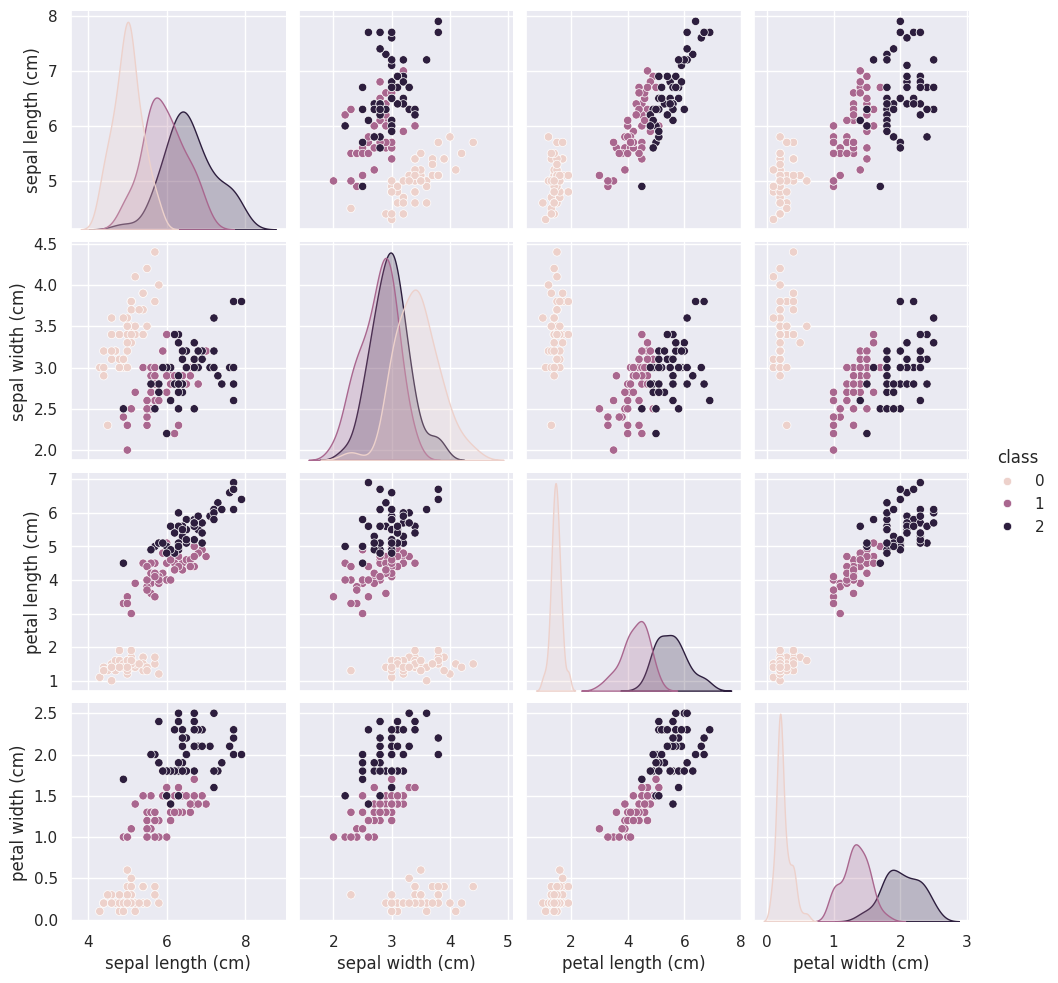

In [8]:
_ = sns.pairplot(df, hue='class')

In [9]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [10]:
x = raw_data.data
y = raw_data.target
x = x[:, :2]

print(x.shape)
print(y.shape)

(150, 2)
(150,)


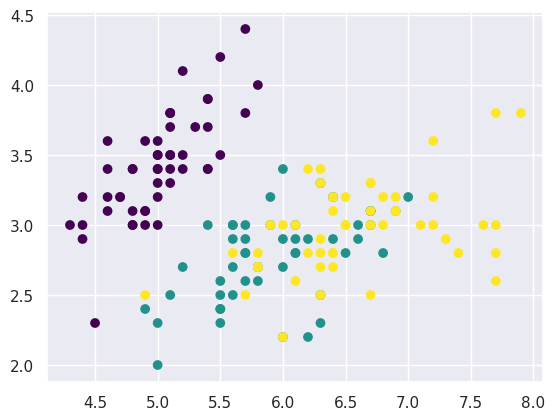

In [11]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.show()

In [12]:
df = pd.DataFrame(x, columns=['sepal_length', 'sepal_width'])
target = pd.DataFrame(y, columns=['class'])
df = pd.concat([df, target], axis=1)
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=800, height=600)

## K-nearest Neighbors Classifer

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x, y)

KNeighborsClassifier()

In [14]:
acc = classifier.score(x, y)
print(f'Accuracy: {acc}')

Accuracy: 0.84


## Wykres granic decyzyjnych

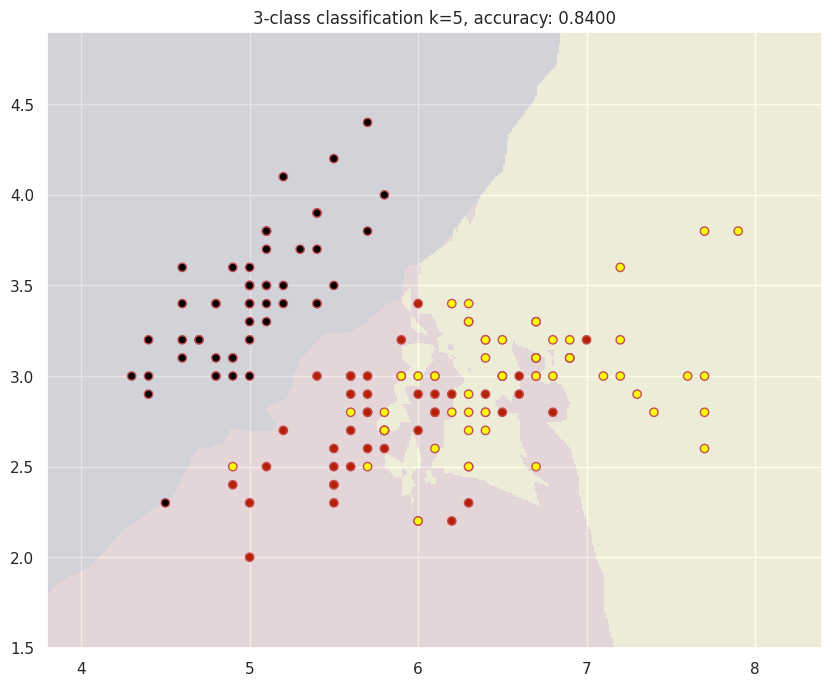

In [15]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k=5, accuracy: {acc:.4f}')
plt.show()

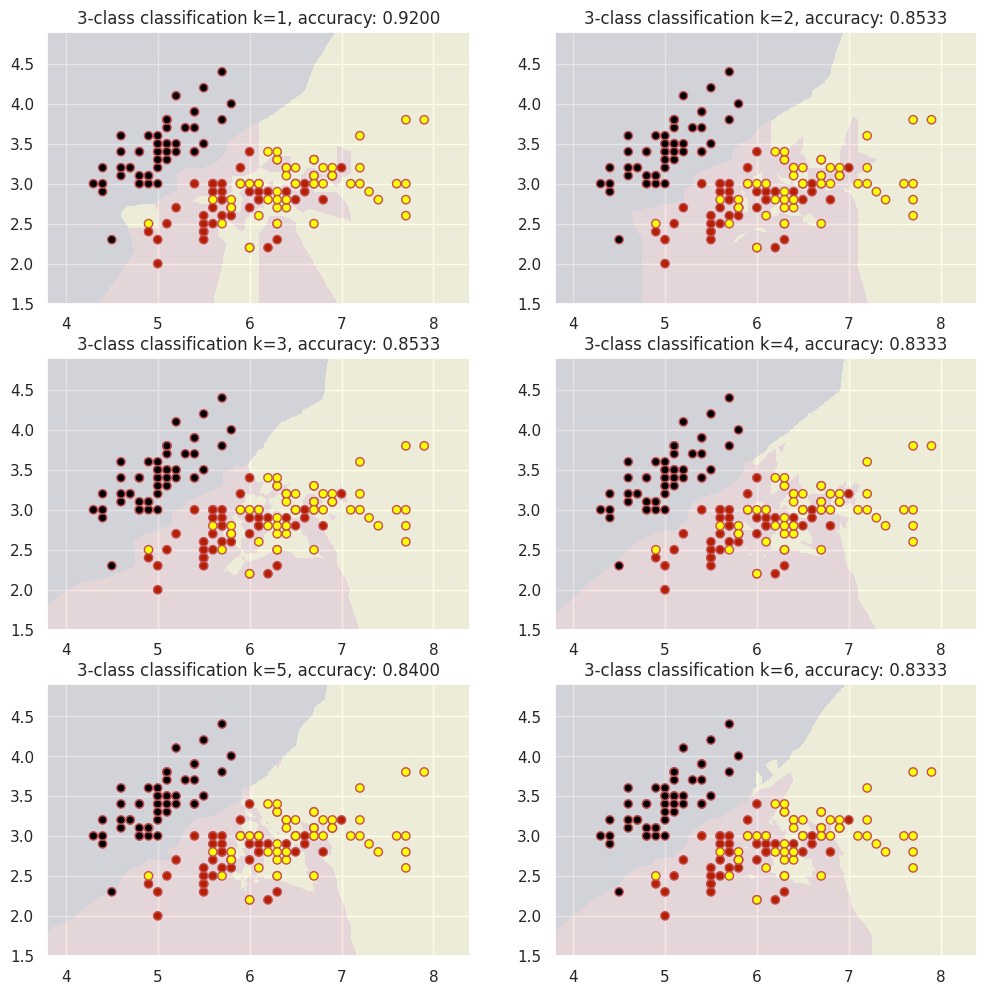

In [17]:
plt.figure(figsize=(12, 12))
for i in range(1, 7):
  plt.subplot(3, 2, i)
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(x, y)
  acc = classifier.score(x, y)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f'3-class classification k={i}, accuracy: {acc:.4f}')

plt.show()

## Grid search

In [19]:
grid_params = {'n_neighbors': range(2, 30)}
classifier = KNeighborsClassifier()
gs = GridSearchCV(classifier, grid_params, cv=3)

gs.fit(x, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)})

In [20]:
gs.best_params_

{'n_neighbors': 6}

In [21]:
k = gs.best_params_['n_neighbors']
k

6

In [22]:
classifier = gs.best_estimator_
classifier

KNeighborsClassifier(n_neighbors=6)

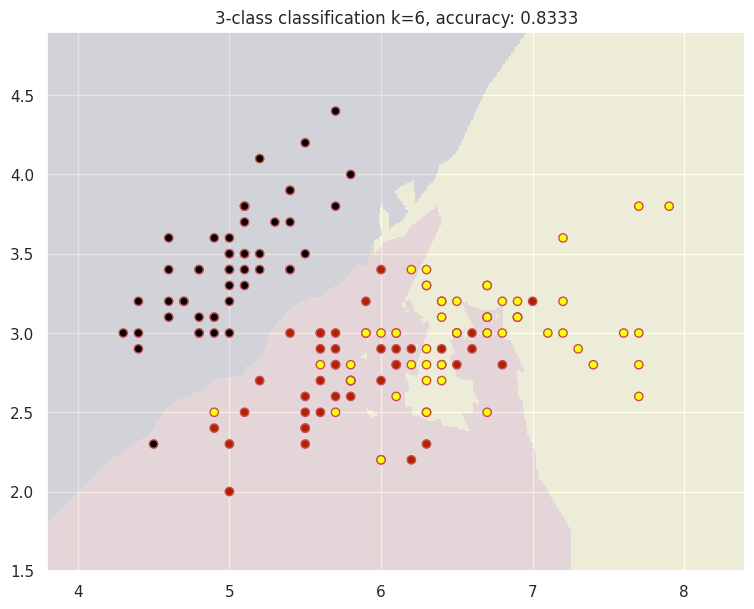

In [23]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = gs.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k={k}, accuracy: {acc:.4f}')
plt.show()